# Task V: Baseline for lense classification with transformer structure

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import torch
import numpy as np
from torch import nn
from torch import Tensor
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from typing import Tuple, Union, List
from sklearn.metrics import accuracy_score
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import torch
from torch import nn, einsum
import torch.nn.functional as F
from einops import rearrange, repeat
from einops.layers.torch import Rearrange
from PIL import Image
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import scienceplots
import random
plt.style.use(['science','ieee','no-latex'])

/home/kaiwei/miniconda3/envs/cogvlm-demo/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data preprocess and helpher functions
1. Same data preprocess and helpher functions in ResNet baseline is used

In [3]:
from utils.utils_v2 import *

In [4]:
from transformers import ViTConfig, ViTForImageClassification

In [5]:
torch.cuda.empty_cache()
train_model = True
# Set random seed for reproducibilnmity
random_seed = 42
torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

    # Number of classes
num_classes = 3

In [6]:
dataset_train, dataloader_train, dataset_val, dataloader_val, dataset_test, dataloader_test, classes = load_dataset(batch_size = 32)

## Model training

1. Load pre-trained base model and modified the last layer of MLP for ViT fine-tuning

In [7]:
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k')
vit_model.classifier = torch.nn.Linear(vit_model.classifier.in_features, 3)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2. Same training procedure as in ResNet fine-tuning used, except AdamW is used as optmizer instead of Adam

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(vit_model.parameters(),lr=5e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=3)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0)
#scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

In [12]:
vit_model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [11]:
num_epochs = 120
save_interval=10
train_epochs(vit_model, dataloader_train, dataloader_val, criterion, optimizer, scheduler, classes, device, num_epochs, save_interval=save_interval, model_prefix = "vit", isLogits=False)

Epoch 1/120


100%|██████████| 94/94 [01:03<00:00,  1.49it/s]


Train Loss: 1.0554 - Train Accuracy: 40.31%
Test Loss: 1.0098 - Test Accuracy: 45.57%
Epoch 2/120


100%|██████████| 94/94 [00:59<00:00,  1.58it/s]


Train Loss: 0.9598 - Train Accuracy: 49.50%
Test Loss: 0.9207 - Test Accuracy: 54.53%
Epoch 3/120


100%|██████████| 94/94 [01:02<00:00,  1.50it/s]


Train Loss: 0.8723 - Train Accuracy: 56.77%
Test Loss: 0.8446 - Test Accuracy: 58.90%
Epoch 4/120


100%|██████████| 94/94 [01:02<00:00,  1.49it/s]


Train Loss: 0.7953 - Train Accuracy: 61.96%
Test Loss: 0.7683 - Test Accuracy: 64.47%
Epoch 5/120


100%|██████████| 94/94 [01:05<00:00,  1.44it/s]


Train Loss: 0.7368 - Train Accuracy: 65.51%
Test Loss: 0.7127 - Test Accuracy: 67.70%
Epoch 6/120


100%|██████████| 94/94 [01:00<00:00,  1.55it/s]


Train Loss: 0.6850 - Train Accuracy: 68.63%
Test Loss: 0.7549 - Test Accuracy: 65.13%
Epoch 7/120


100%|██████████| 94/94 [00:59<00:00,  1.57it/s]


Train Loss: 0.6414 - Train Accuracy: 70.83%
Test Loss: 0.6272 - Test Accuracy: 71.63%
Epoch 8/120


100%|██████████| 94/94 [01:03<00:00,  1.47it/s]


Train Loss: 0.6149 - Train Accuracy: 72.42%
Test Loss: 0.6162 - Test Accuracy: 73.17%
Epoch 9/120


100%|██████████| 94/94 [01:02<00:00,  1.50it/s]


Train Loss: 0.5743 - Train Accuracy: 74.49%
Test Loss: 0.6390 - Test Accuracy: 72.30%
Epoch 10/120


100%|██████████| 94/94 [00:59<00:00,  1.57it/s]


Train Loss: 0.5454 - Train Accuracy: 76.15%
Test Loss: 0.5745 - Test Accuracy: 75.27%
Epoch 11/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.5275 - Train Accuracy: 77.47%
Test Loss: 0.5240 - Test Accuracy: 77.67%
Epoch 12/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.4995 - Train Accuracy: 78.54%
Test Loss: 0.5175 - Test Accuracy: 78.13%
Epoch 13/120


100%|██████████| 94/94 [00:44<00:00,  2.11it/s]


Train Loss: 0.4790 - Train Accuracy: 79.57%
Test Loss: 0.5257 - Test Accuracy: 76.83%
Epoch 14/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.4633 - Train Accuracy: 80.39%
Test Loss: 0.4892 - Test Accuracy: 78.60%
Epoch 15/120


100%|██████████| 94/94 [00:42<00:00,  2.19it/s]


Train Loss: 0.4435 - Train Accuracy: 81.20%
Test Loss: 0.4858 - Test Accuracy: 79.60%
Epoch 16/120


100%|██████████| 94/94 [00:43<00:00,  2.19it/s]


Train Loss: 0.4274 - Train Accuracy: 82.26%
Test Loss: 0.5052 - Test Accuracy: 78.70%
Epoch 17/120


100%|██████████| 94/94 [00:43<00:00,  2.17it/s]


Train Loss: 0.4149 - Train Accuracy: 82.71%
Test Loss: 0.4367 - Test Accuracy: 81.57%
Epoch 18/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.3991 - Train Accuracy: 83.63%
Test Loss: 0.4392 - Test Accuracy: 81.73%
Epoch 19/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.3830 - Train Accuracy: 84.61%
Test Loss: 0.4146 - Test Accuracy: 82.93%
Epoch 20/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.3736 - Train Accuracy: 84.90%
Test Loss: 0.4170 - Test Accuracy: 83.17%
Epoch 21/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.3614 - Train Accuracy: 85.32%
Test Loss: 0.3892 - Test Accuracy: 84.47%
Epoch 22/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.3514 - Train Accuracy: 85.86%
Test Loss: 0.3911 - Test Accuracy: 83.90%
Epoch 23/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.3398 - Train Accuracy: 86.29%
Test Loss: 0.4045 - Test Accuracy: 83.97%
Epoch 24/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.3269 - Train Accuracy: 86.86%
Test Loss: 0.3494 - Test Accuracy: 86.40%
Epoch 25/120


100%|██████████| 94/94 [00:42<00:00,  2.19it/s]


Train Loss: 0.3226 - Train Accuracy: 87.13%
Test Loss: 0.3641 - Test Accuracy: 85.63%
Epoch 26/120


100%|██████████| 94/94 [00:42<00:00,  2.20it/s]


Train Loss: 0.3178 - Train Accuracy: 87.18%
Test Loss: 0.3716 - Test Accuracy: 85.70%
Epoch 27/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.3055 - Train Accuracy: 87.98%
Test Loss: 0.3521 - Test Accuracy: 85.80%
Epoch 28/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.3001 - Train Accuracy: 88.16%
Test Loss: 0.3567 - Test Accuracy: 86.00%
Epoch 29/120


100%|██████████| 94/94 [00:42<00:00,  2.19it/s]


Train Loss: 0.2366 - Train Accuracy: 90.81%
Test Loss: 0.2949 - Test Accuracy: 88.00%
Epoch 30/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.2145 - Train Accuracy: 91.81%
Test Loss: 0.2801 - Test Accuracy: 89.57%
Epoch 31/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.2139 - Train Accuracy: 91.97%
Test Loss: 0.2837 - Test Accuracy: 88.97%
Epoch 32/120


100%|██████████| 94/94 [00:42<00:00,  2.19it/s]


Train Loss: 0.2044 - Train Accuracy: 92.24%
Test Loss: 0.2686 - Test Accuracy: 89.73%
Epoch 33/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.1968 - Train Accuracy: 92.42%
Test Loss: 0.2834 - Test Accuracy: 89.70%
Epoch 34/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.1951 - Train Accuracy: 92.43%
Test Loss: 0.3043 - Test Accuracy: 88.60%
Epoch 35/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.1939 - Train Accuracy: 92.54%
Test Loss: 0.2730 - Test Accuracy: 89.90%
Epoch 36/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.1842 - Train Accuracy: 92.94%
Test Loss: 0.2862 - Test Accuracy: 90.07%
Epoch 37/120


100%|██████████| 94/94 [00:44<00:00,  2.10it/s]


Train Loss: 0.1537 - Train Accuracy: 94.32%
Test Loss: 0.2533 - Test Accuracy: 91.03%
Epoch 38/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.1484 - Train Accuracy: 94.35%
Test Loss: 0.2471 - Test Accuracy: 91.10%
Epoch 39/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.1409 - Train Accuracy: 94.70%
Test Loss: 0.2509 - Test Accuracy: 91.20%
Epoch 40/120


100%|██████████| 94/94 [00:44<00:00,  2.13it/s]


Train Loss: 0.1343 - Train Accuracy: 95.04%
Test Loss: 0.2412 - Test Accuracy: 91.13%
Epoch 41/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.1335 - Train Accuracy: 95.05%
Test Loss: 0.2485 - Test Accuracy: 91.47%
Epoch 42/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.1346 - Train Accuracy: 94.99%
Test Loss: 0.2467 - Test Accuracy: 91.07%
Epoch 43/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.1264 - Train Accuracy: 95.19%
Test Loss: 0.2428 - Test Accuracy: 90.93%
Epoch 44/120


100%|██████████| 94/94 [00:42<00:00,  2.20it/s]


Train Loss: 0.1251 - Train Accuracy: 95.44%
Test Loss: 0.2402 - Test Accuracy: 92.30%
Epoch 45/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.1241 - Train Accuracy: 95.39%
Test Loss: 0.2645 - Test Accuracy: 91.13%
Epoch 46/120


100%|██████████| 94/94 [00:43<00:00,  2.14it/s]


Train Loss: 0.1192 - Train Accuracy: 95.50%
Test Loss: 0.2247 - Test Accuracy: 92.40%
Epoch 47/120


100%|██████████| 94/94 [00:44<00:00,  2.13it/s]


Train Loss: 0.1177 - Train Accuracy: 95.63%
Test Loss: 0.2271 - Test Accuracy: 92.63%
Epoch 48/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.1172 - Train Accuracy: 95.62%
Test Loss: 0.2351 - Test Accuracy: 92.10%
Epoch 49/120


100%|██████████| 94/94 [00:43<00:00,  2.17it/s]


Train Loss: 0.1137 - Train Accuracy: 95.80%
Test Loss: 0.2391 - Test Accuracy: 91.67%
Epoch 50/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.1099 - Train Accuracy: 95.92%
Test Loss: 0.2391 - Test Accuracy: 91.77%
Epoch 51/120


100%|██████████| 94/94 [00:43<00:00,  2.17it/s]


Train Loss: 0.0990 - Train Accuracy: 96.50%
Test Loss: 0.2401 - Test Accuracy: 91.67%
Epoch 52/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.0898 - Train Accuracy: 96.67%
Test Loss: 0.2476 - Test Accuracy: 92.60%
Epoch 53/120


100%|██████████| 94/94 [00:44<00:00,  2.13it/s]


Train Loss: 0.0904 - Train Accuracy: 96.84%
Test Loss: 0.2442 - Test Accuracy: 92.37%
Epoch 54/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.0839 - Train Accuracy: 96.89%
Test Loss: 0.2360 - Test Accuracy: 92.07%
Epoch 55/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.0802 - Train Accuracy: 97.14%
Test Loss: 0.2367 - Test Accuracy: 92.73%
Epoch 56/120


100%|██████████| 94/94 [00:45<00:00,  2.05it/s]


Train Loss: 0.0768 - Train Accuracy: 97.26%
Test Loss: 0.2259 - Test Accuracy: 92.87%
Epoch 57/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.0742 - Train Accuracy: 97.30%
Test Loss: 0.2310 - Test Accuracy: 92.90%
Epoch 58/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0738 - Train Accuracy: 97.34%
Test Loss: 0.2392 - Test Accuracy: 92.23%
Epoch 59/120


100%|██████████| 94/94 [00:43<00:00,  2.17it/s]


Train Loss: 0.0697 - Train Accuracy: 97.52%
Test Loss: 0.2283 - Test Accuracy: 92.70%
Epoch 60/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.0696 - Train Accuracy: 97.61%
Test Loss: 0.2461 - Test Accuracy: 92.43%
Epoch 61/120


100%|██████████| 94/94 [00:44<00:00,  2.13it/s]


Train Loss: 0.0651 - Train Accuracy: 97.68%
Test Loss: 0.2506 - Test Accuracy: 92.63%
Epoch 62/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0681 - Train Accuracy: 97.47%
Test Loss: 0.2420 - Test Accuracy: 92.53%
Epoch 63/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0632 - Train Accuracy: 97.83%
Test Loss: 0.2414 - Test Accuracy: 92.93%
Epoch 64/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.0659 - Train Accuracy: 97.65%
Test Loss: 0.2099 - Test Accuracy: 93.60%
Epoch 65/120


100%|██████████| 94/94 [00:42<00:00,  2.19it/s]


Train Loss: 0.0657 - Train Accuracy: 97.62%
Test Loss: 0.2193 - Test Accuracy: 92.97%
Epoch 66/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.0650 - Train Accuracy: 97.76%
Test Loss: 0.2264 - Test Accuracy: 93.17%
Epoch 67/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.0642 - Train Accuracy: 97.74%
Test Loss: 0.2243 - Test Accuracy: 93.77%
Epoch 68/120


100%|██████████| 94/94 [00:43<00:00,  2.17it/s]


Train Loss: 0.0645 - Train Accuracy: 97.73%
Test Loss: 0.2314 - Test Accuracy: 92.97%
Epoch 69/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.0636 - Train Accuracy: 97.73%
Test Loss: 0.2308 - Test Accuracy: 92.97%
Epoch 70/120


100%|██████████| 94/94 [00:43<00:00,  2.17it/s]


Train Loss: 0.0620 - Train Accuracy: 97.81%
Test Loss: 0.2438 - Test Accuracy: 92.70%
Epoch 71/120


100%|██████████| 94/94 [00:44<00:00,  2.13it/s]


Train Loss: 0.0602 - Train Accuracy: 97.77%
Test Loss: 0.2279 - Test Accuracy: 92.90%
Epoch 72/120


100%|██████████| 94/94 [00:43<00:00,  2.14it/s]


Train Loss: 0.0627 - Train Accuracy: 97.73%
Test Loss: 0.2289 - Test Accuracy: 92.73%
Epoch 73/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.0613 - Train Accuracy: 97.93%
Test Loss: 0.2441 - Test Accuracy: 92.83%
Epoch 74/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.0621 - Train Accuracy: 97.83%
Test Loss: 0.2375 - Test Accuracy: 92.43%
Epoch 75/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0603 - Train Accuracy: 97.84%
Test Loss: 0.2225 - Test Accuracy: 93.03%
Epoch 76/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0584 - Train Accuracy: 97.94%
Test Loss: 0.2265 - Test Accuracy: 92.73%
Epoch 77/120


100%|██████████| 94/94 [00:43<00:00,  2.14it/s]


Train Loss: 0.0580 - Train Accuracy: 97.92%
Test Loss: 0.2095 - Test Accuracy: 93.40%
Epoch 78/120


100%|██████████| 94/94 [00:43<00:00,  2.17it/s]


Train Loss: 0.0586 - Train Accuracy: 97.97%
Test Loss: 0.2335 - Test Accuracy: 93.10%
Epoch 79/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0572 - Train Accuracy: 98.01%
Test Loss: 0.2258 - Test Accuracy: 93.27%
Epoch 80/120


100%|██████████| 94/94 [00:42<00:00,  2.20it/s]


Train Loss: 0.0625 - Train Accuracy: 97.72%
Test Loss: 0.2239 - Test Accuracy: 93.27%
Epoch 81/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0573 - Train Accuracy: 97.93%
Test Loss: 0.2437 - Test Accuracy: 93.20%
Epoch 82/120


100%|██████████| 94/94 [00:44<00:00,  2.13it/s]


Train Loss: 0.0590 - Train Accuracy: 97.96%
Test Loss: 0.2258 - Test Accuracy: 92.90%
Epoch 83/120


100%|██████████| 94/94 [00:44<00:00,  2.10it/s]


Train Loss: 0.0600 - Train Accuracy: 97.97%
Test Loss: 0.2059 - Test Accuracy: 93.30%
Epoch 84/120


100%|██████████| 94/94 [00:43<00:00,  2.14it/s]


Train Loss: 0.0588 - Train Accuracy: 97.95%
Test Loss: 0.2165 - Test Accuracy: 93.23%
Epoch 85/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.0588 - Train Accuracy: 97.92%
Test Loss: 0.2299 - Test Accuracy: 93.37%
Epoch 86/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0588 - Train Accuracy: 97.91%
Test Loss: 0.2332 - Test Accuracy: 92.70%
Epoch 87/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.0592 - Train Accuracy: 97.91%
Test Loss: 0.2321 - Test Accuracy: 92.97%
Epoch 88/120


100%|██████████| 94/94 [00:42<00:00,  2.21it/s]


Train Loss: 0.0576 - Train Accuracy: 97.96%
Test Loss: 0.2248 - Test Accuracy: 92.77%
Epoch 89/120


100%|██████████| 94/94 [00:44<00:00,  2.13it/s]


Train Loss: 0.0586 - Train Accuracy: 97.99%
Test Loss: 0.2162 - Test Accuracy: 93.77%
Epoch 90/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0589 - Train Accuracy: 97.94%
Test Loss: 0.2442 - Test Accuracy: 92.93%
Epoch 91/120


100%|██████████| 94/94 [00:42<00:00,  2.19it/s]


Train Loss: 0.0579 - Train Accuracy: 97.92%
Test Loss: 0.2111 - Test Accuracy: 93.70%
Epoch 92/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0580 - Train Accuracy: 97.86%
Test Loss: 0.2211 - Test Accuracy: 92.87%
Epoch 93/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0617 - Train Accuracy: 97.81%
Test Loss: 0.2233 - Test Accuracy: 92.97%
Epoch 94/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.0597 - Train Accuracy: 97.82%
Test Loss: 0.2386 - Test Accuracy: 92.83%
Epoch 95/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.0583 - Train Accuracy: 97.99%
Test Loss: 0.2300 - Test Accuracy: 93.03%
Epoch 96/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.0617 - Train Accuracy: 97.86%
Test Loss: 0.2274 - Test Accuracy: 93.47%
Epoch 97/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.0587 - Train Accuracy: 97.95%
Test Loss: 0.2240 - Test Accuracy: 93.40%
Epoch 98/120


100%|██████████| 94/94 [00:42<00:00,  2.20it/s]


Train Loss: 0.0567 - Train Accuracy: 98.06%
Test Loss: 0.2217 - Test Accuracy: 93.37%
Epoch 99/120


100%|██████████| 94/94 [00:42<00:00,  2.19it/s]


Train Loss: 0.0593 - Train Accuracy: 97.93%
Test Loss: 0.2490 - Test Accuracy: 92.37%
Epoch 100/120


100%|██████████| 94/94 [00:43<00:00,  2.19it/s]


Train Loss: 0.0577 - Train Accuracy: 97.99%
Test Loss: 0.2238 - Test Accuracy: 93.60%
Epoch 101/120


100%|██████████| 94/94 [00:42<00:00,  2.19it/s]


Train Loss: 0.0603 - Train Accuracy: 97.89%
Test Loss: 0.2097 - Test Accuracy: 93.40%
Epoch 102/120


100%|██████████| 94/94 [00:44<00:00,  2.13it/s]


Train Loss: 0.0604 - Train Accuracy: 97.89%
Test Loss: 0.2288 - Test Accuracy: 93.00%
Epoch 103/120


100%|██████████| 94/94 [00:43<00:00,  2.14it/s]


Train Loss: 0.0612 - Train Accuracy: 97.82%
Test Loss: 0.2504 - Test Accuracy: 92.50%
Epoch 104/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0577 - Train Accuracy: 98.01%
Test Loss: 0.2311 - Test Accuracy: 93.07%
Epoch 105/120


100%|██████████| 94/94 [00:42<00:00,  2.19it/s]


Train Loss: 0.0596 - Train Accuracy: 97.85%
Test Loss: 0.2083 - Test Accuracy: 93.00%
Epoch 106/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0588 - Train Accuracy: 97.92%
Test Loss: 0.2244 - Test Accuracy: 93.30%
Epoch 107/120


100%|██████████| 94/94 [00:43<00:00,  2.15it/s]


Train Loss: 0.0597 - Train Accuracy: 97.91%
Test Loss: 0.2360 - Test Accuracy: 93.37%
Epoch 108/120


100%|██████████| 94/94 [00:43<00:00,  2.14it/s]


Train Loss: 0.0623 - Train Accuracy: 97.81%
Test Loss: 0.2183 - Test Accuracy: 93.03%
Epoch 109/120


100%|██████████| 94/94 [00:44<00:00,  2.13it/s]


Train Loss: 0.0595 - Train Accuracy: 97.87%
Test Loss: 0.2317 - Test Accuracy: 92.97%
Epoch 110/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.0569 - Train Accuracy: 97.95%
Test Loss: 0.2147 - Test Accuracy: 93.50%
Epoch 111/120


100%|██████████| 94/94 [00:44<00:00,  2.10it/s]


Train Loss: 0.0603 - Train Accuracy: 97.86%
Test Loss: 0.2200 - Test Accuracy: 92.33%
Epoch 112/120


100%|██████████| 94/94 [00:43<00:00,  2.14it/s]


Train Loss: 0.0616 - Train Accuracy: 97.76%
Test Loss: 0.2196 - Test Accuracy: 93.37%
Epoch 113/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0566 - Train Accuracy: 97.99%
Test Loss: 0.2146 - Test Accuracy: 93.07%
Epoch 114/120


100%|██████████| 94/94 [00:43<00:00,  2.18it/s]


Train Loss: 0.0599 - Train Accuracy: 97.87%
Test Loss: 0.2453 - Test Accuracy: 93.13%
Epoch 115/120


100%|██████████| 94/94 [00:44<00:00,  2.13it/s]


Train Loss: 0.0623 - Train Accuracy: 97.87%
Test Loss: 0.2340 - Test Accuracy: 93.07%
Epoch 116/120


100%|██████████| 94/94 [00:44<00:00,  2.13it/s]


Train Loss: 0.0611 - Train Accuracy: 97.83%
Test Loss: 0.2287 - Test Accuracy: 92.93%
Epoch 117/120


100%|██████████| 94/94 [00:42<00:00,  2.20it/s]


Train Loss: 0.0587 - Train Accuracy: 97.95%
Test Loss: 0.2388 - Test Accuracy: 92.80%
Epoch 118/120


100%|██████████| 94/94 [00:43<00:00,  2.14it/s]


Train Loss: 0.0589 - Train Accuracy: 98.00%
Test Loss: 0.2286 - Test Accuracy: 92.77%
Epoch 119/120


100%|██████████| 94/94 [00:43<00:00,  2.16it/s]


Train Loss: 0.0588 - Train Accuracy: 97.94%
Test Loss: 0.2201 - Test Accuracy: 93.37%
Epoch 120/120


100%|██████████| 94/94 [00:44<00:00,  2.12it/s]


Train Loss: 0.0584 - Train Accuracy: 97.96%
Test Loss: 0.2496 - Test Accuracy: 92.93%


(ViTForImageClassification(
   (vit): ViTModel(
     (embeddings): ViTEmbeddings(
       (patch_embeddings): ViTPatchEmbeddings(
         (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
       )
       (dropout): Dropout(p=0.0, inplace=False)
     )
     (encoder): ViTEncoder(
       (layer): ModuleList(
         (0-11): 12 x ViTLayer(
           (attention): ViTAttention(
             (attention): ViTSelfAttention(
               (query): Linear(in_features=768, out_features=768, bias=True)
               (key): Linear(in_features=768, out_features=768, bias=True)
               (value): Linear(in_features=768, out_features=768, bias=True)
               (dropout): Dropout(p=0.0, inplace=False)
             )
             (output): ViTSelfOutput(
               (dense): Linear(in_features=768, out_features=768, bias=True)
               (dropout): Dropout(p=0.0, inplace=False)
             )
           )
           (intermediate): ViTIntermediate(
             (den

## Model Inference

In [7]:
configuration = ViTConfig()
vit_model = ViTForImageClassification(configuration)
vit_model.classifier = torch.nn.Linear(vit_model.classifier.in_features, 3)
vit_model.load_state_dict(torch.load('weights/vit_lense_120.pth'))
checkpoint = torch.load("weights/vit_lense_variables_120.pth")
epoch = checkpoint['epoch']
train_losses = checkpoint['train_losses']
train_accuracies = checkpoint['train_accuracies']
val_losses = checkpoint['test_losses']
val_accuracies = checkpoint['test_accuracies']
classes = checkpoint['classes']

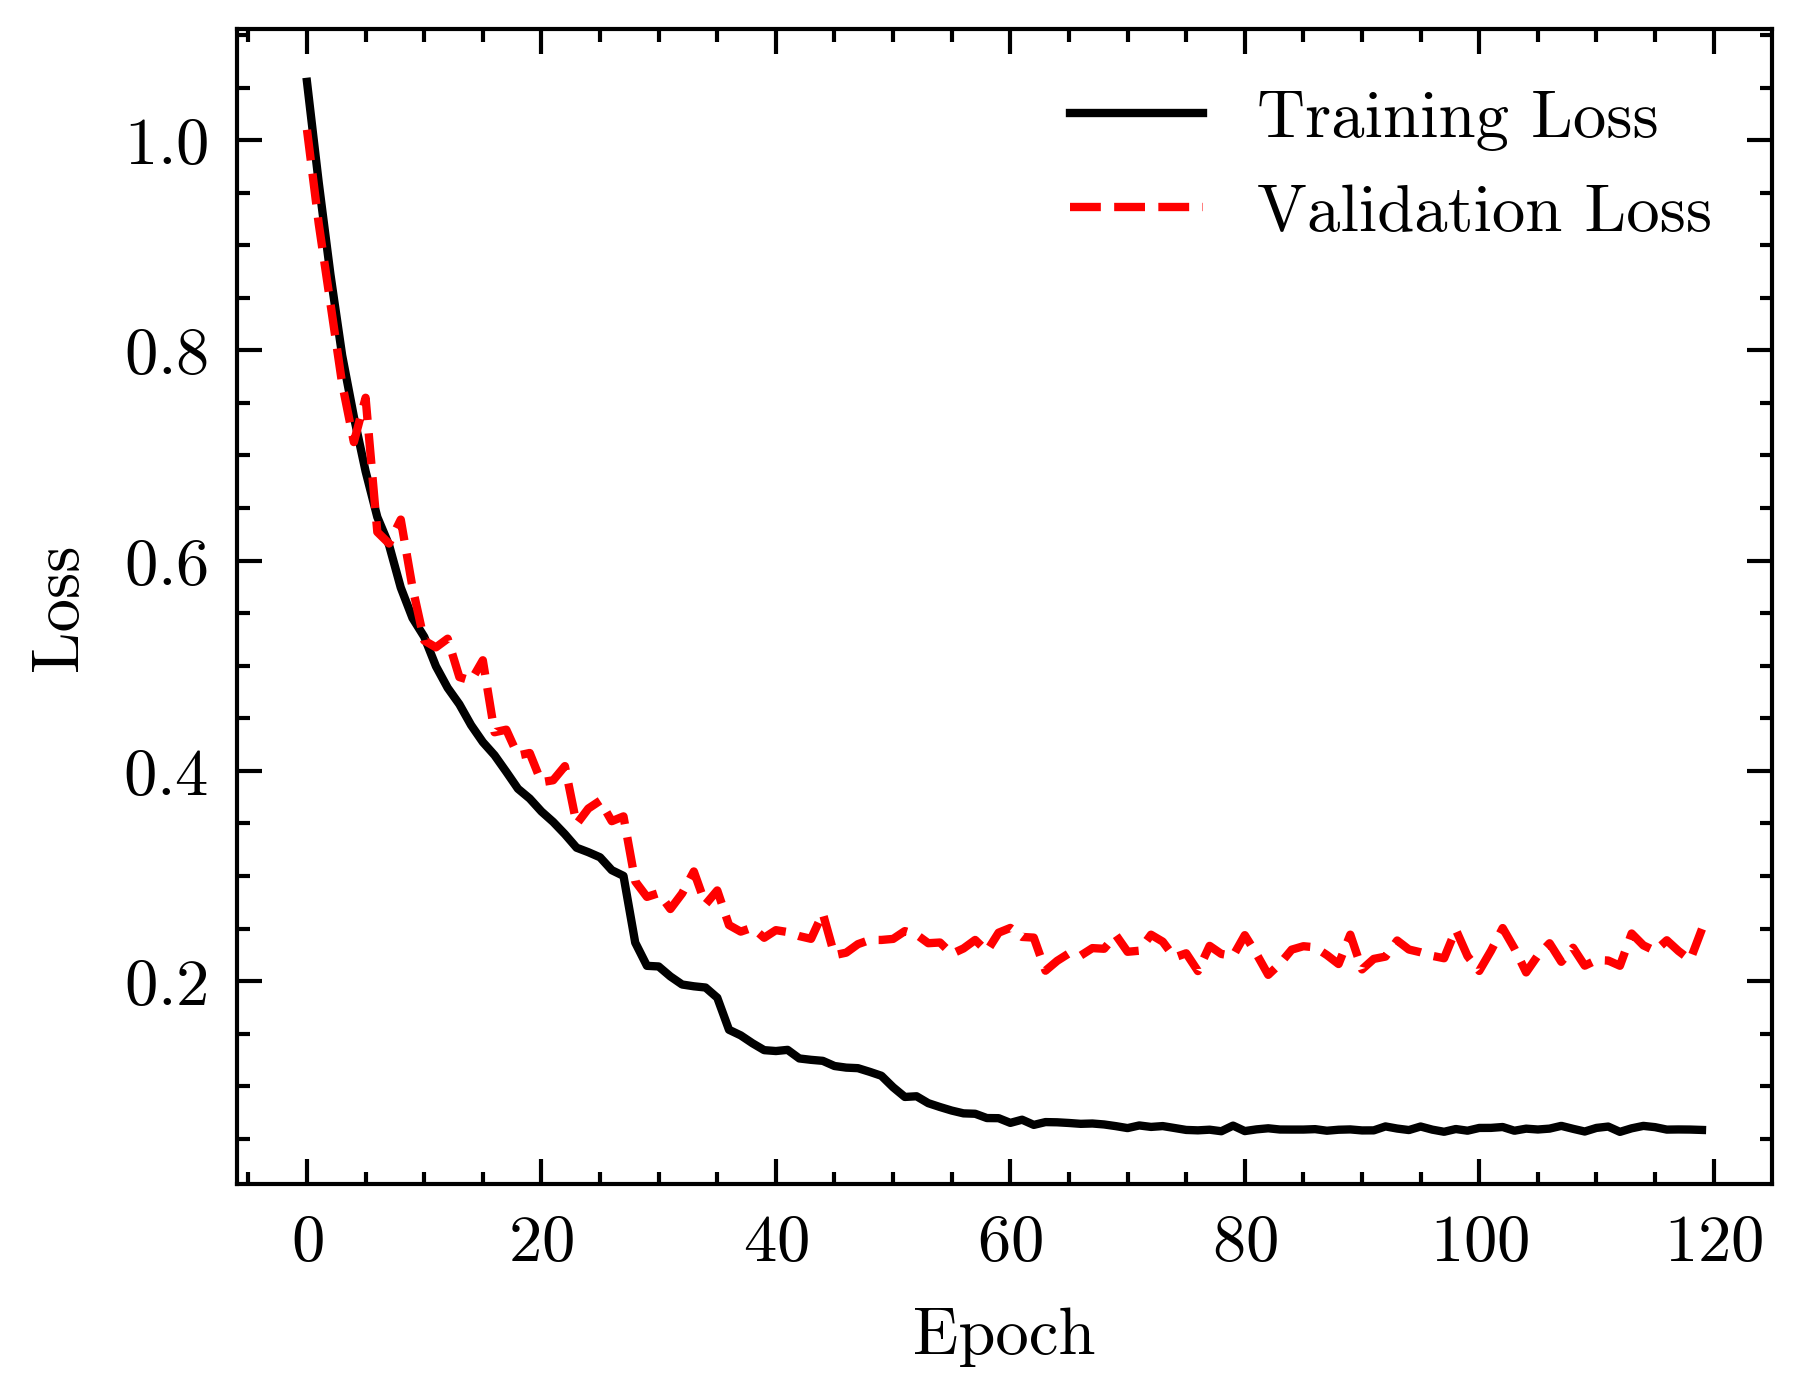

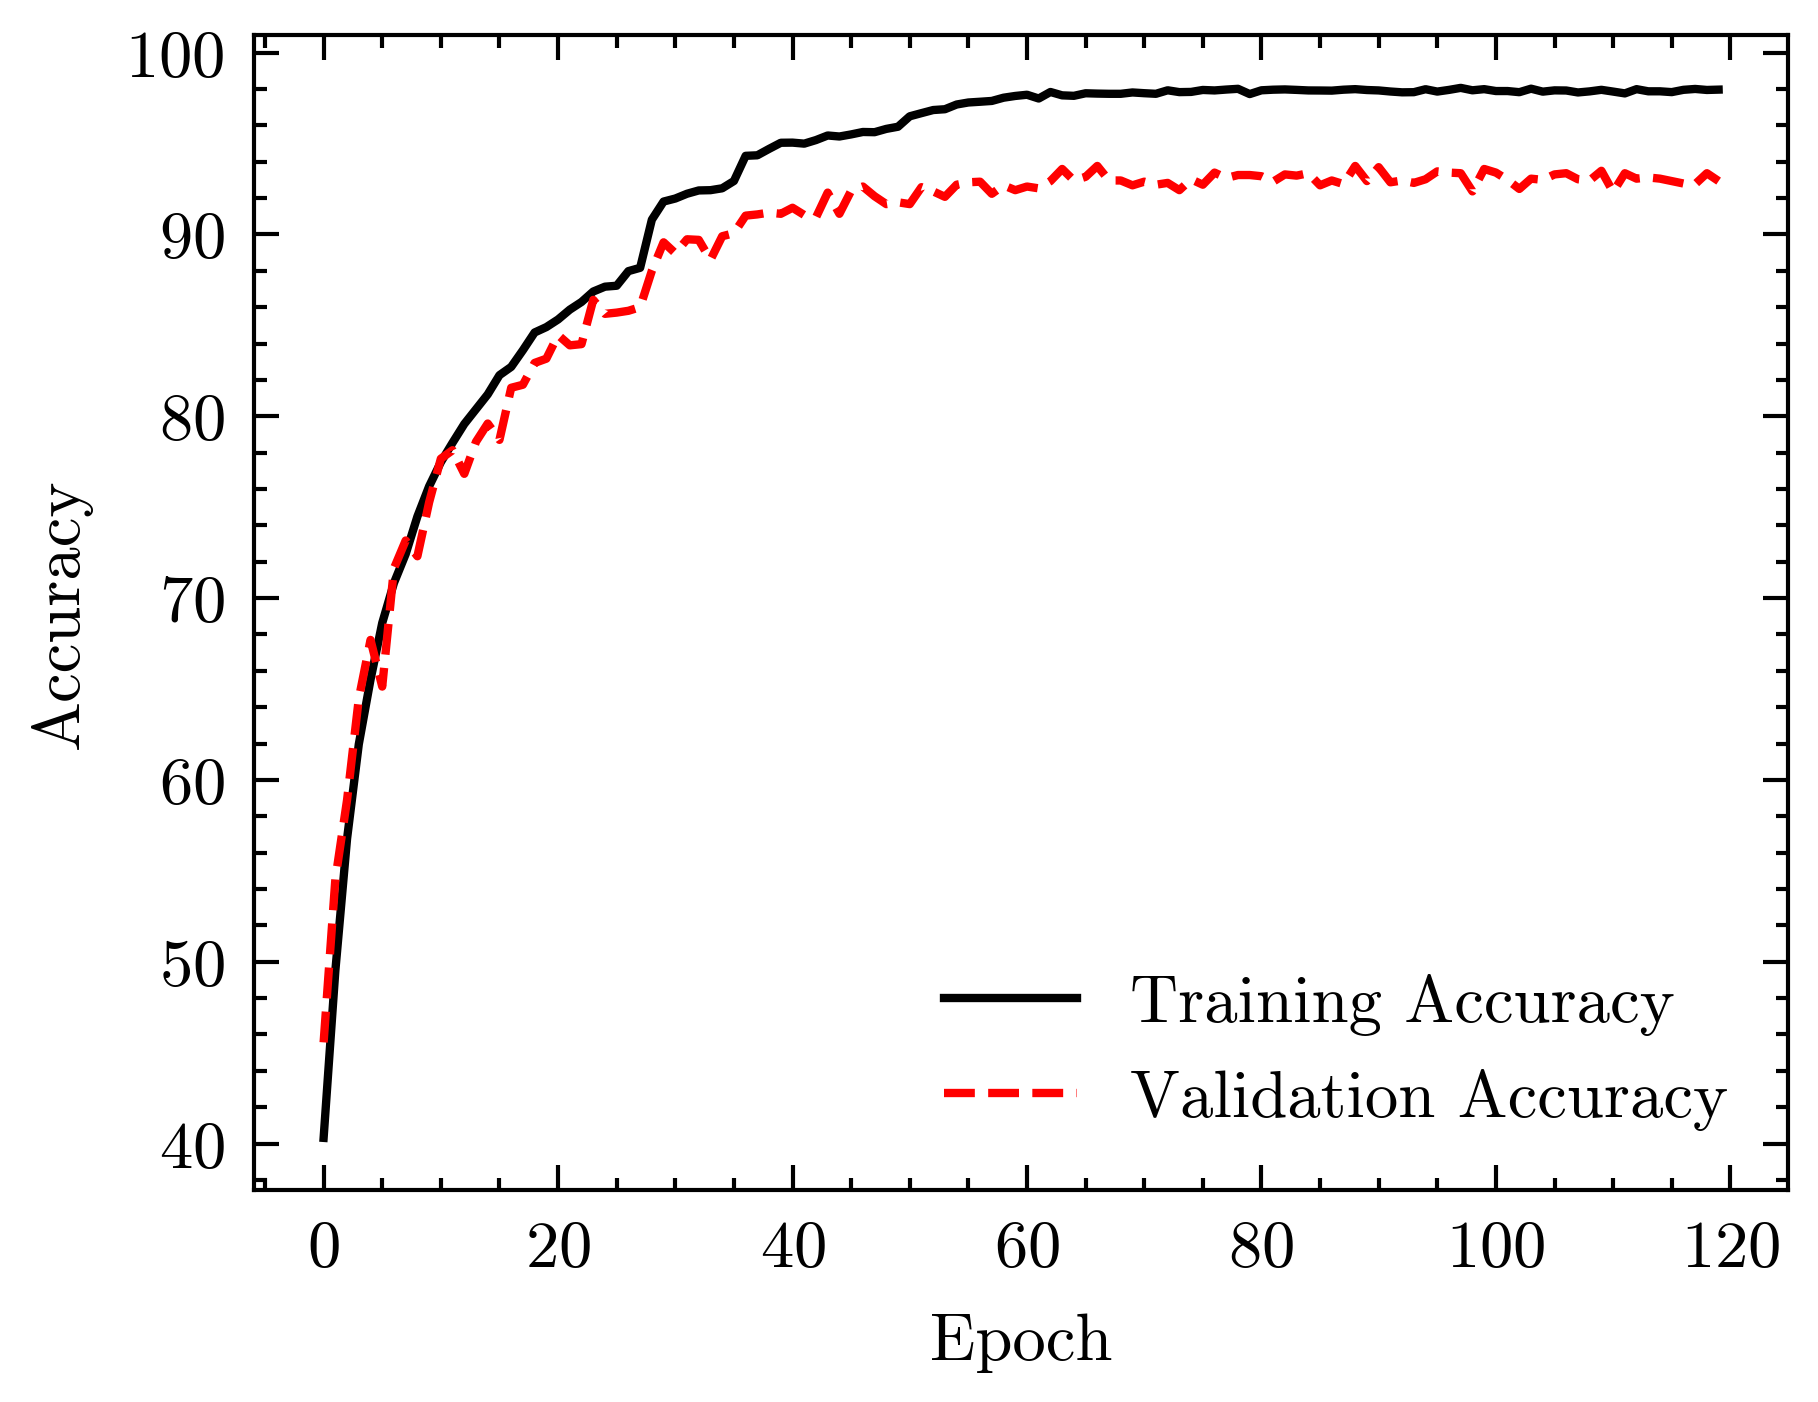

In [8]:
plot_loss(train_losses, val_losses)
plot_accuracy(train_accuracies, val_accuracies)

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vit_model.to(device)
vit_model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [11]:
criterion = nn.CrossEntropyLoss()

In [12]:
from  torch.nn.functional import softmax
vit_model.to(device)
vit_model.eval()

test_loss = 0.0
test_total = 0
test_correct = 0

test_prop = []
test_label = []

with torch.no_grad():
    for inputs, labels in tqdm(dataloader_test):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = vit_model(inputs).logits
        loss = criterion(outputs, labels)

        # Update test loss
        test_loss += loss.item() * inputs.size(0)

        probabilities = softmax(outputs, dim=1)
        test_prop.append(probabilities)
        test_label.append(labels)

        # Compute test accuracy
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

100%|██████████| 235/235 [01:48<00:00,  2.18it/s]


In [13]:
print("Test Accu:", test_correct/test_total)

Test Accu: 0.9338666666666666


/tmp/ipykernel_174430/9899610.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


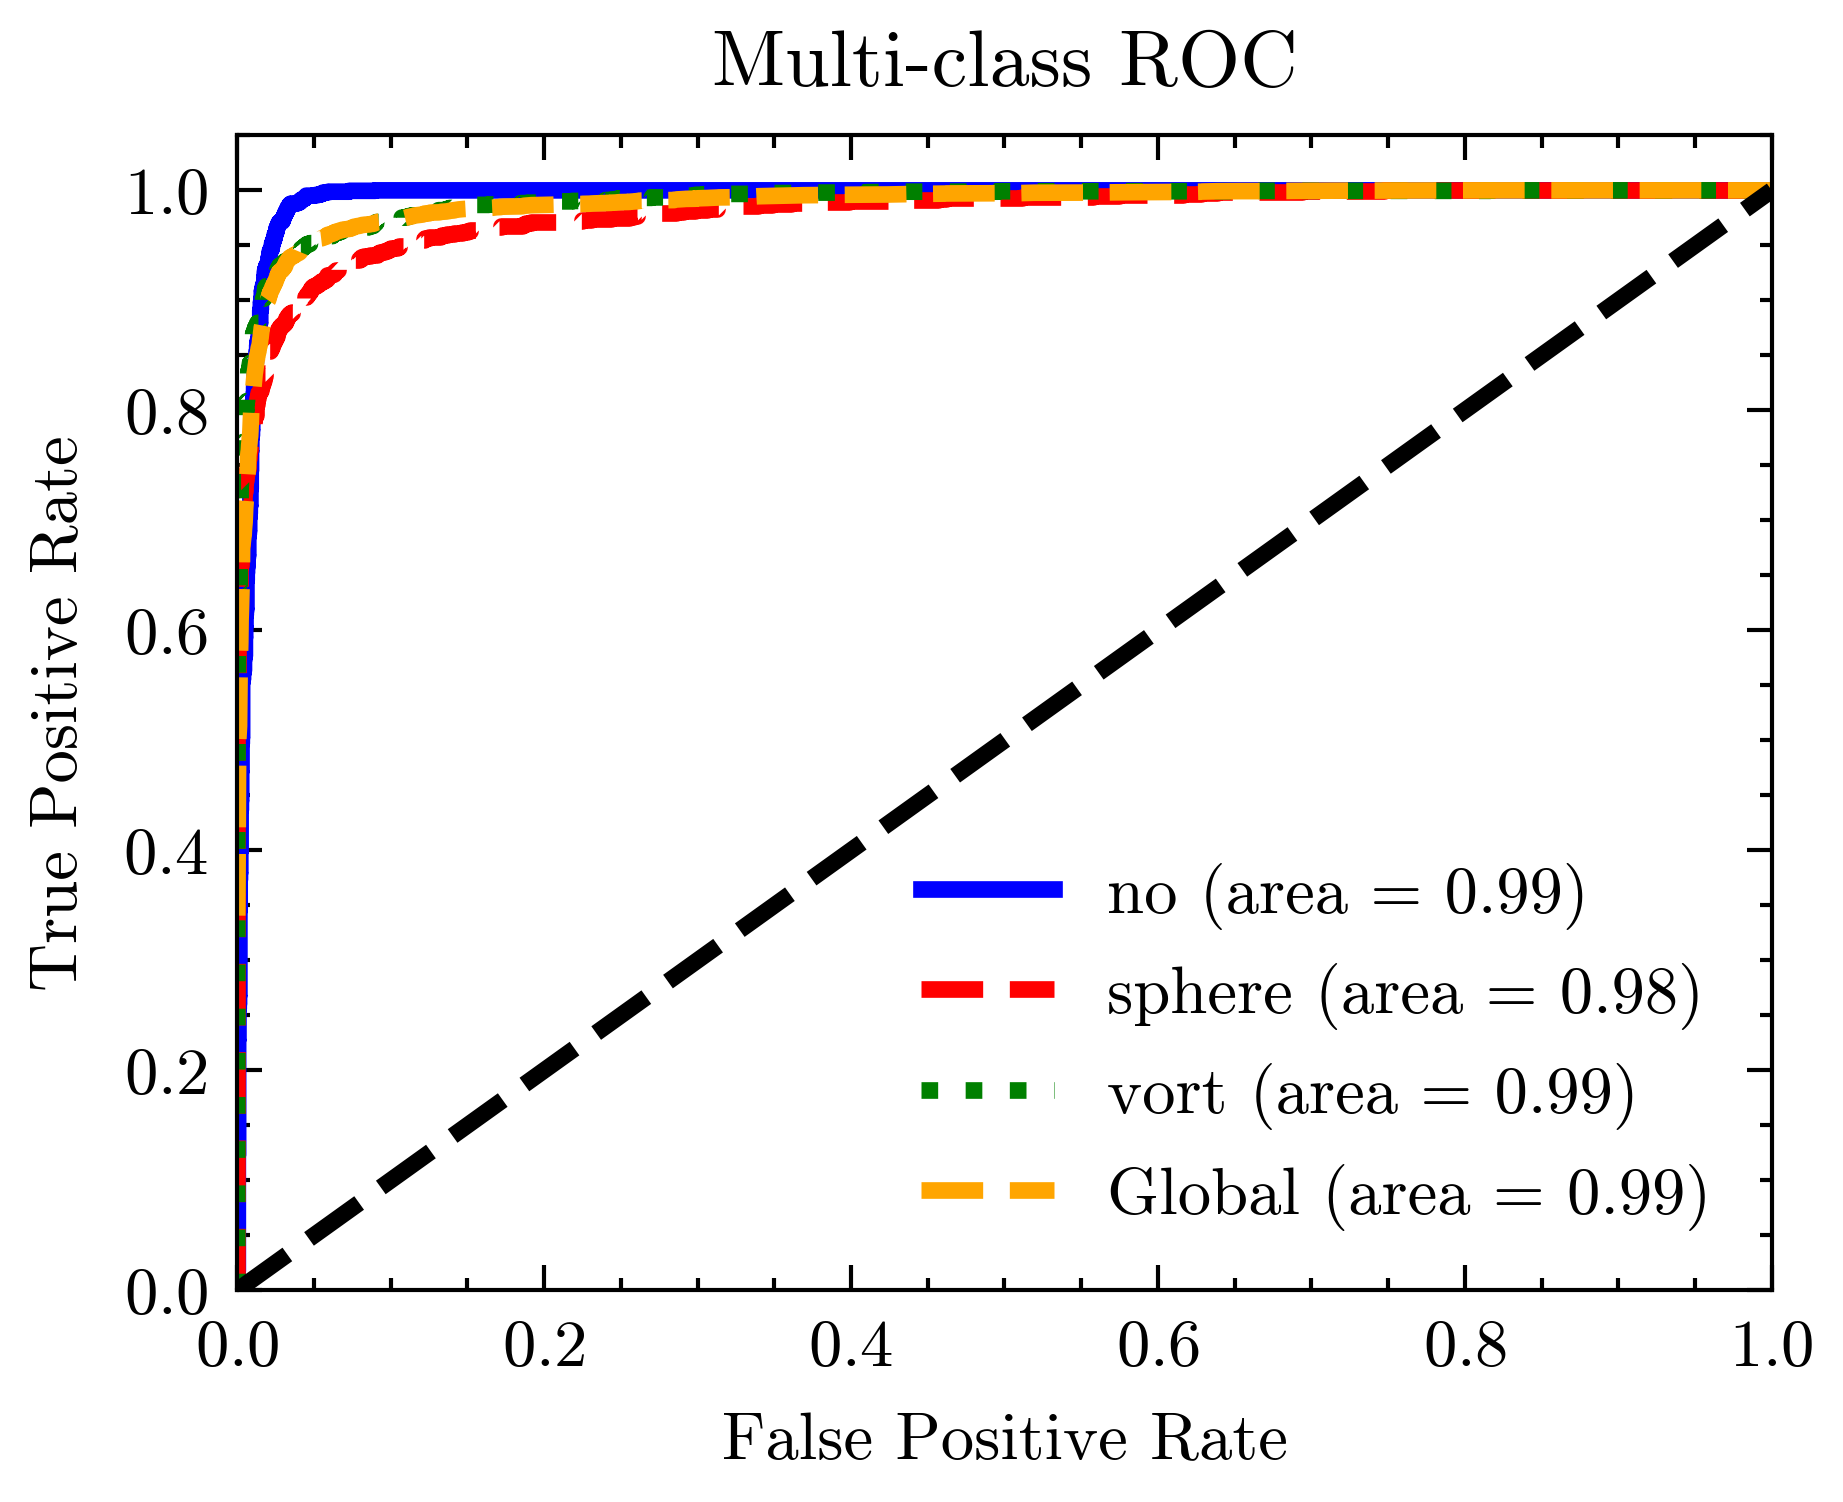

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test are your true class labels and y_score are the predicted probabilities

y_test = []
y_score = []

for item in test_prop:
    y_score += item.detach().cpu().tolist()
for item in test_label:
    y_test += item.detach().cpu().tolist()

y_test = np.array(y_test)
y_score = np.array(y_score)

# Binarize the output classes for one-vs-all computation
n_classes = y_score.shape[1] # Assuming y_score is shape (n_samples, n_classes)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange', 'black', 'purple', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (area = {1:.2f})'
             ''.format(classes[i], roc_auc[i]))
    
plt.plot(fpr["macro"], tpr["macro"],
         label='Global (area = {0:.2f})'.format(roc_auc["macro"]),
         color='orange', linestyle='--', linewidth=2)
plt.legend(fontsize='small')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.savefig("VIT_Multi-class_ROC.png")
plt.show()

Similar performance is archieved using transformer-based Image classification model comparing to Convolutional-based model for the gravity lense dataset 